## Shallow Neural Networks - Planar Data Classification with one hidden layer
DeepLearning.ai - Course 1 - Week 3 - Andrew Ng

### Neural Network Representation
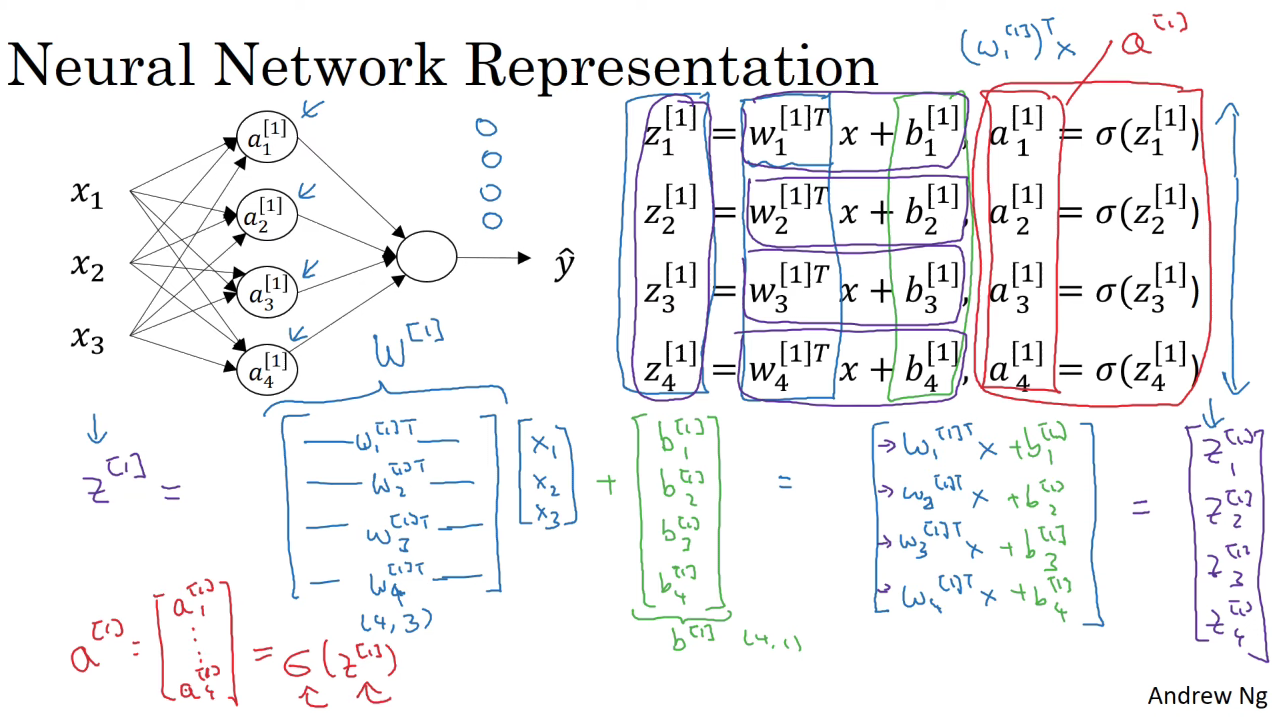

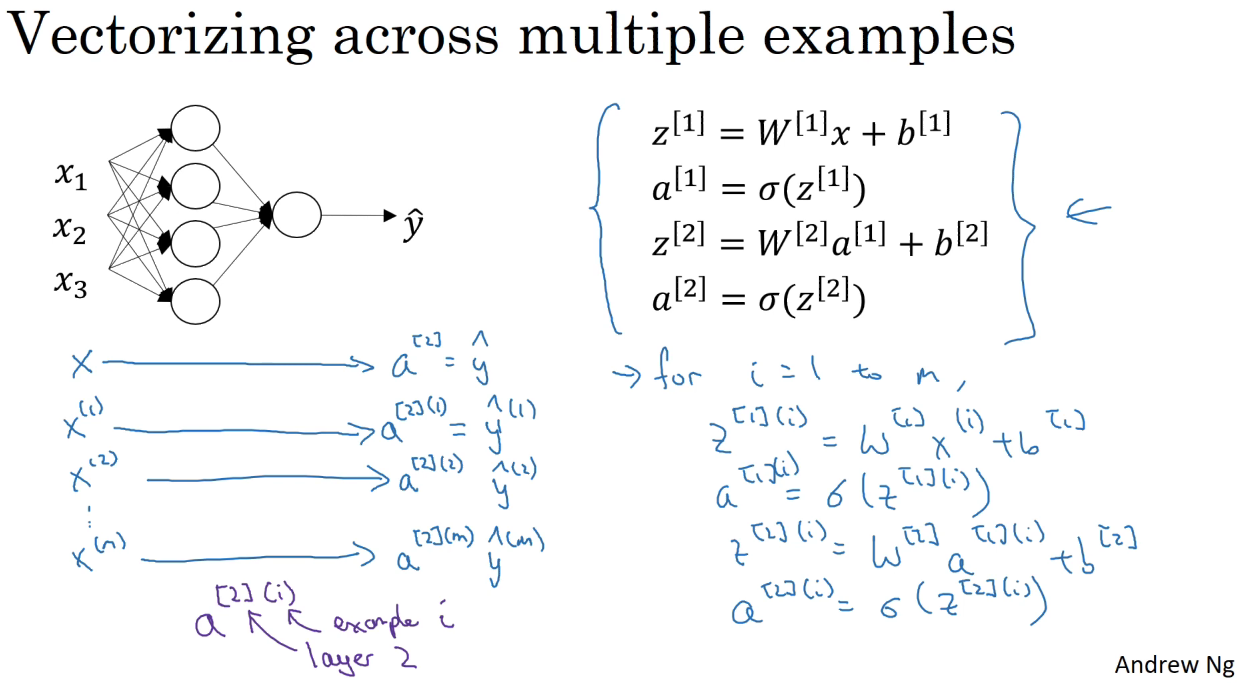

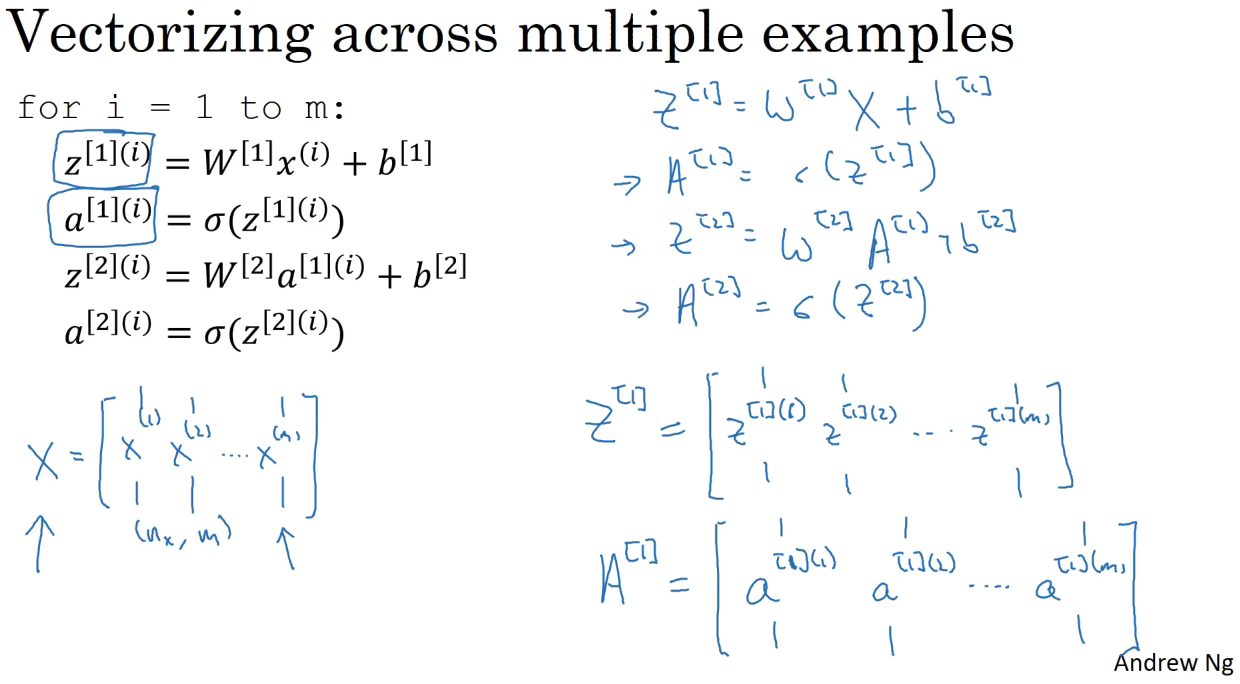

Note: $Z^{[1](1)}$ is a column vector for training example (1), where the number of rows corresponds to the number of nodes in hidden layer [1]

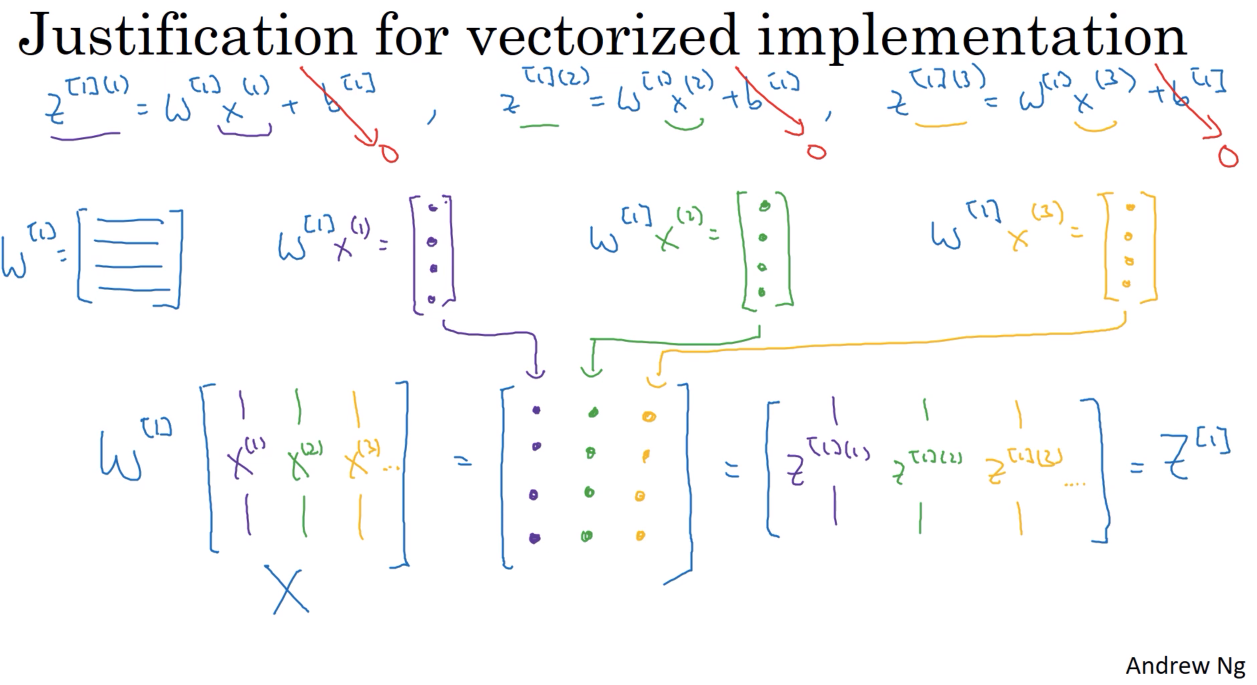

If b is not zero, then python will broadcast $[b^{(1)}, b^{(2)}, b^{(3)}]$ and add each to the corresponding column

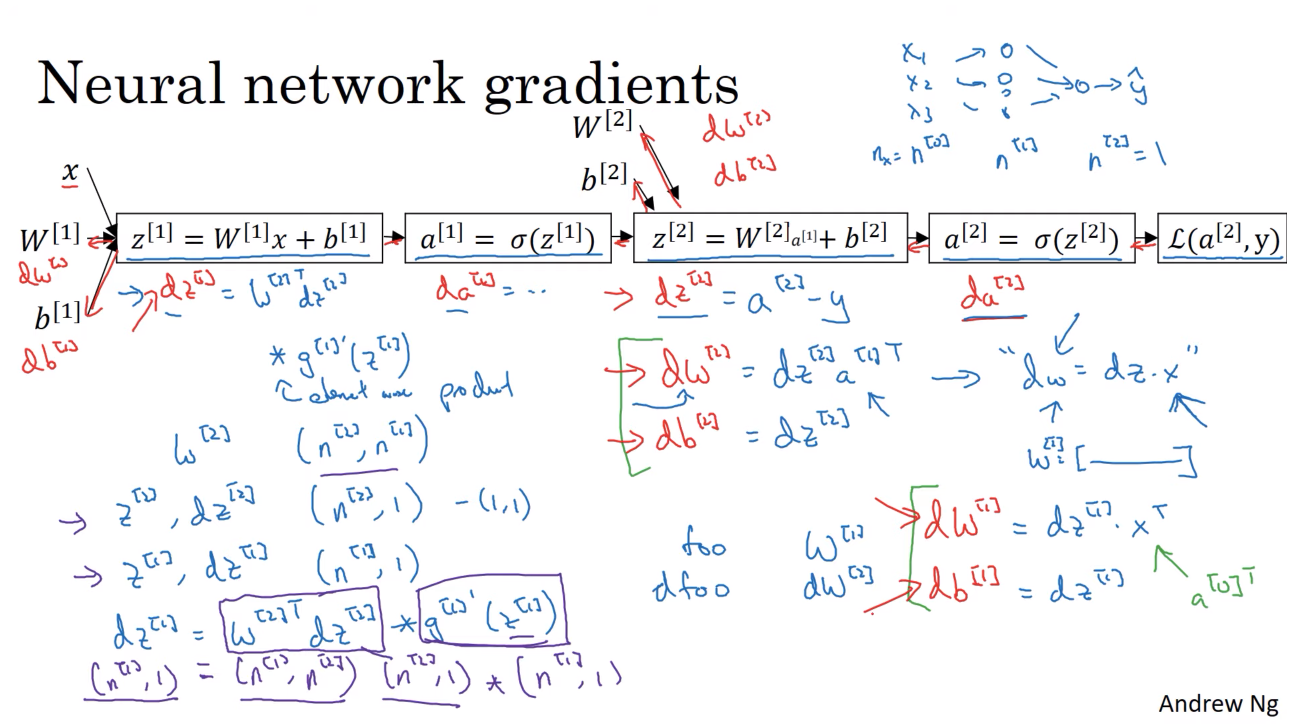

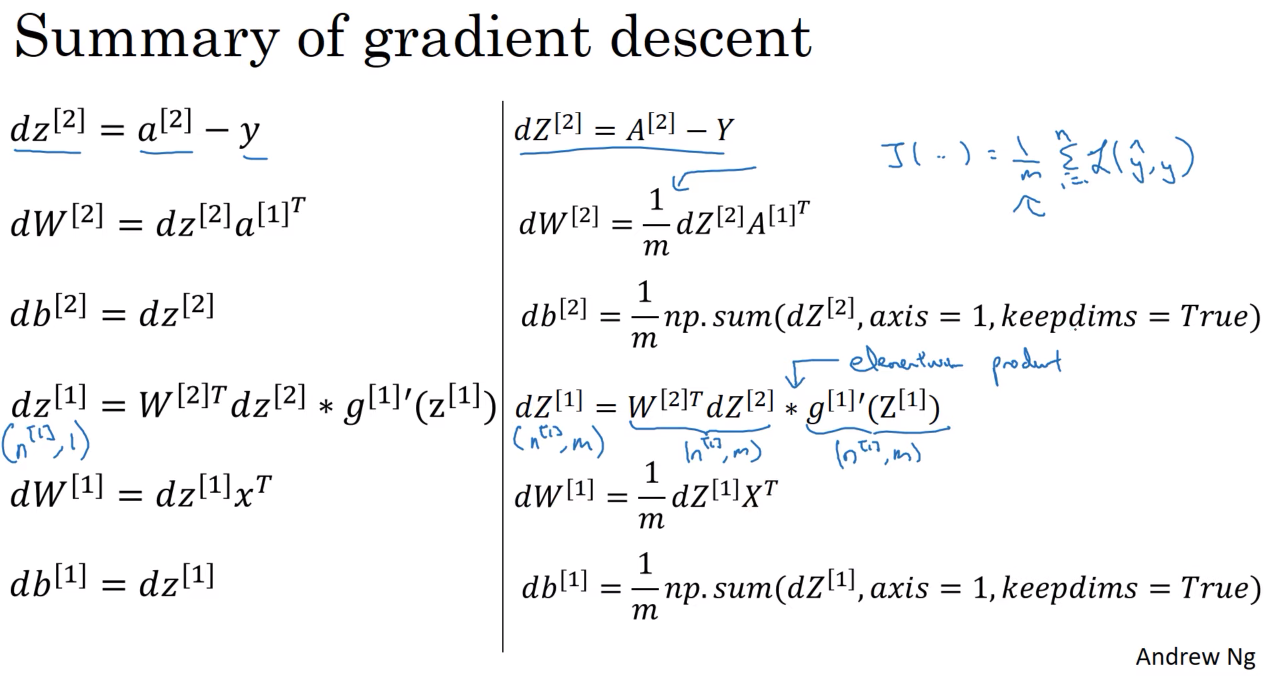

On the left is for 1 sample ----------------------------------------------------  On the right is for m samples

## Planar data Classification with one hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (4, 3)

In [142]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400
    N = int(m/2)   # number of points per class
    D = 2          # dimensionality
    X = np.zeros((m, D))
    Y = np.zeros((m, 1), dtype='uint8')   # labels vector: 0 for red, 1 for blue
    a = 4          # maximum ray of the 'flower'

    for j in range(2):
        ix = range(N*j, N*(j+1))          # j=0: ix=range(0, 200); j=1: ix=range(200, 400)
        t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2     # theta
        r = a * np.sin(4*t) + np.random.randn(N)*0.2                        # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]    # X's 1st col: r*np.sin(t), X's 2nd col: r*np.cos(t)
        Y[ix] = j

    X = X.T       # X's 1st row: r*np.sin(t), X's 2nd row: r*np.cos(t)
    Y = Y.T
    return X, Y

In [15]:
X = np.zeros((10, 2))
ix = range(0, 10)

In [36]:
X.T

array([[ 0.        ,  1.3360851 ,  0.92028998, -2.93656712, -2.64143321,
         2.38930512,  3.12010383, -0.729431  , -1.43309272, -0.00745003],
       [ 0.        ,  3.69844829,  1.10750811, -1.72372736, -0.49193832,
        -0.39180688, -1.74199671,  0.84023206,  3.71400356,  0.34497264]])

In [33]:
t = np.linspace(0, 3.12, 10)
r = 4*np.sin(4*t)
X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
np.c_[r*np.sin(t), r*np.cos(t)]

array([[ 0.        ,  0.        ],
       [ 1.3360851 ,  3.69844829],
       [ 0.92028998,  1.10750811],
       [-2.93656712, -1.72372736],
       [-2.64143321, -0.49193832],
       [ 2.38930512, -0.39180688],
       [ 3.12010383, -1.74199671],
       [-0.729431  ,  0.84023206],
       [-1.43309272,  3.71400356],
       [-0.00745003,  0.34497264]])

In [29]:
r*np.sin(t)

array([ 0.        ,  1.3360851 ,  0.92028998, -2.93656712, -2.64143321,
        2.38930512,  3.12010383, -0.729431  , -1.43309272, -0.00745003])

In [30]:
r*np.cos(t)

array([ 0.        ,  3.69844829,  1.10750811, -1.72372736, -0.49193832,
       -0.39180688, -1.74199671,  0.84023206,  3.71400356,  0.34497264])

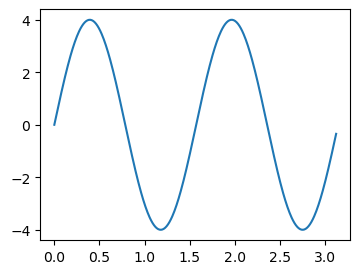

In [56]:
x = np.linspace(0, 3.12, 400)
y = 4*np.sin(4*x)
plt.plot(x, y);

In [143]:
X, Y = load_planar_dataset()

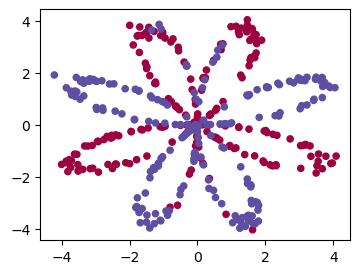

In [144]:
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral); 

The data looks like a 'flower' with some red (label y=0) and some blue (label y=1) points. Your goal is to build a model to fit this data, i.e. we want the classifier to define regions as either red or blue. To summarize, we have:
* a 2D numpy array (matrix) X that contains your features (x1, x2)
* a 1D numpy array (vector) Y that contains your labels (0 and 1)
* 400 training points

In [67]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (X.shape[1]))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


### Simple Logistic Regression
Before building a full neural network, let's first see how logistic regression performs on this problem. We'll use sklearn's LogisticRegression to do that.

In [68]:
from sklearn.linear_model import LogisticRegression

In [131]:
clf = LogisticRegression(random_state=42)
clf.fit(X.T, Y.T.ravel())

LogisticRegression(random_state=42)

In [132]:
y_preds = clf.predict(X.T)
np.sum(y_preds == Y.T.ravel()) / len(y_preds)

0.47

In [157]:
# call: plot_decision_boundary(lambda x: clf.predict(x), X, Y) for clf = LogisticRegression()
# call: plot_decision_boundary(lambda x: clf.predict(x.T), X, Y) for our nn_model function since or predict() 
# expect input data X of size (n_x, m)
def plot_decision_boundary(clf_predict, X, Y):
    # set min and max values and give it some padding
    x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
    x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # generate a grid of points with distance h between them
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # predict for the whole grid
    Z = clf_predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # plot the contour and the training examples
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(X[0, :], X[1, :], c=Y, s=15, cmap=plt.cm.Spectral)

In [159]:
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01

# generate a grid of points with distance h between them
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

In [161]:
np.c_[xx1.ravel(), xx2.ravel()].shape   # (m, n_x)

(1038240, 2)

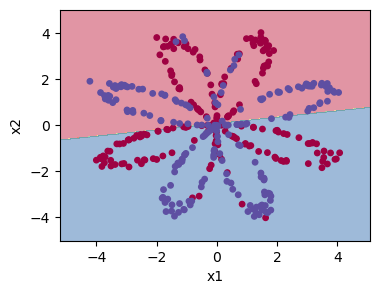

In [141]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)

Interpretation: The 'flower' dataset is not linearly separable, and so logistic regression doesn't perform well. Hopefully a neural network will do better.

### Neural Network Model
Here's our model:

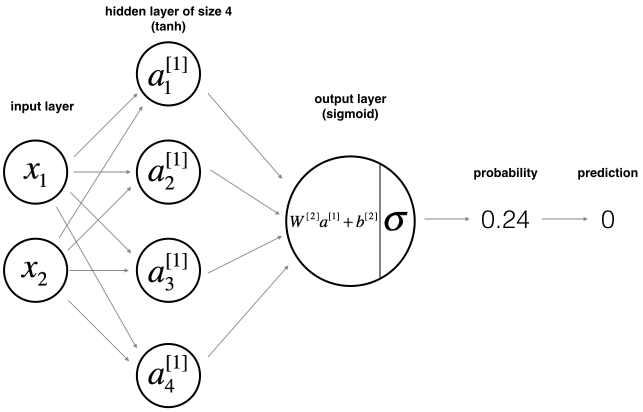

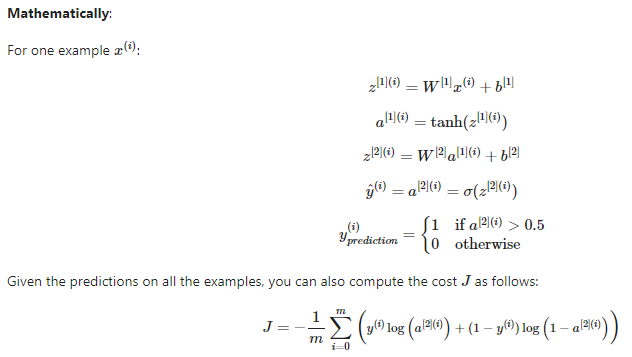

**Reminder**: The general methodology to build a Neural Network is to: 
1. Define the neural network structure (# of input units, # of hidden units, etc)
2. Initialize the model's parameters
3. Loop:
   * Implement forward propagation
   * Compute loss
   * Implement backward propagation to get the gradients
   * Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once you've built nn_model() and learnt the right parameters, you can make predictions on new data.

### Defining the neural network structure
**Exercise**: Define 3 variables:
* n_x: the size of the input layer (use shape of X to find n_x)
* n_h: the size of the hidden layer (set this to 4)
* n_y: the size of the output layer (use shape of Y to find n_y)

In [86]:
def layer_sizes(X, Y):
    """
    Arguments:
    - X: input dataset of shape (input size, number of examples), i.e. one column is one example
    - Y: labels of shape (output size, number of examples)
    Returns:
    - n_x: the size of the input layer
    - n_y: the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y

In [89]:
# initialize the model's parameters
def initialize_params(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return params

In [92]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [93]:
def forward_propagation(X, params):
    """
    Arguments:
    X: input data of size (n_x, m), where m is the number of examples, n_x the number of features
    Returns:
    A2: the sigmoid output of the second activation
    cache: a dictionary containing Z1, A1, Z2 and A2
    """
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

    return A2, cache

Now that we have computed $A^{[2]}$, which contains $a^{[2](i)}$ for every example, we can compute the cost functions (aggregate of cross-entropy loss) as follows:
$$J = - \frac{1}{m} \; \sum_{i=1}^m \; (y^{(i)} \; log (a^{[2](i)}) + (1 - y^{(i)}) \; log (1 - a^{[2](i)}))$$

We can use either np.multiply() and then np.sum() or directly np.dot()

Note that if you use np.multiply followed by np.sum the end result will be a type float, whereas if you use np.dot, the result will be a 2D numpy array. 

We can use np.squeeze() to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type float using float().

In [95]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -1/m * np.sum(logprobs)
    
    # makes sure cost is the dimension that we expect. ex: turns [[17]] into 17
    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))
    return cost

### Derivatives of activation functions (sigmoid, tanh, reLU, leaky reLU)
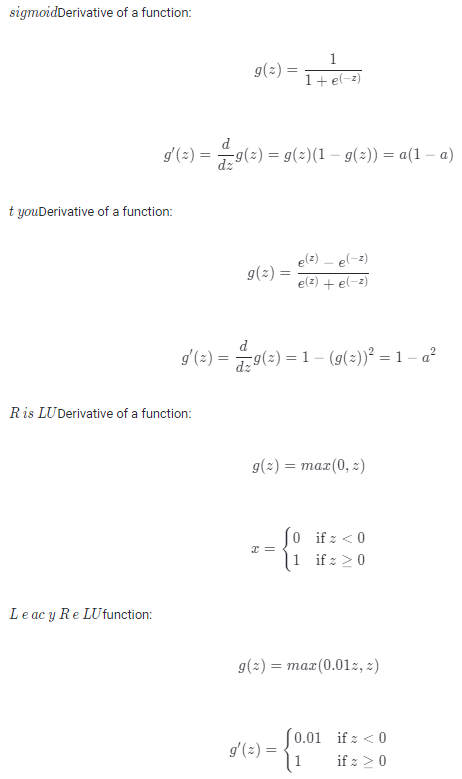

In [98]:
# see notes on 'Summary of gradient descent' above
def backward_propagation(params, cache, X, Y):
    """
    Returns:
    grads: dictionary containing your gradients with respect to the different parameters
    """
    m = X.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    b1 = params['b1']
    b2 = params['b2']
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']

    # gradient of the cost function J with respect to Z2, dJ/dZ2, activation is sigmoid
    dZ2 = A2 - Y

    # dJ/dW2
    dW2 = (1/m) * np.dot(dZ2, A1.T)

    # dJ/db2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # dJ/dZ1, activation is tanh
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # (*) -> element-wise product, right-hand side:derivative of tanh

    # dJ/dW1
    dW1 = (1/m) * np.dot(dZ1, X.T)

    # dJ/db1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    return grads

In [57]:
m = X.shape[1]
W1 = params['W1']; W2 = params['W2']
b1 = params['b1']; b2 = params['b2']
Z1 = cache['Z1']; A1 = cache['A1']
Z2 = cache['Z2']; A2 = cache['A2']

In [58]:
dZ2 = A2 - Y

In [73]:
dZ2.shape

(1, 400)

In [63]:
np.sum(dZ2, axis=1, keepdims=True)

array([[-0.00435693]])

In [65]:
np.dot(W2.T, dZ2).shape

(4, 400)

In [66]:
A2.shape

(1, 400)

In [67]:
(1 - np.power(A2, 2)).shape

(1, 400)

In [69]:
dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A2, 2))

In [70]:
dZ1.shape

(4, 400)

In [72]:
(A2 * (1 - A2)).shape

(1, 400)

In [100]:
def update_params(params, grads, learning_rate):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {'W1' : W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return params

In [173]:
def nn_model(X, Y, n_h, learning_rate, n_iters=10000, print_cost=False):
    n_x, n_y = layer_sizes(X, Y)
    params = initialize_params(n_x, n_h, n_y)
    for i in range(n_iters):
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(params, cache, X, Y)
        params = update_params(params, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print('Cost after iteration %d: %f' % (i, cost))

    return params

In [135]:
def predict(params, X):
    """
    Arguments:
    X: input data of size (n_x, m)
    """
    A2, _ = forward_propagation(X, params)
    return (A2 > 0.5) * 1

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ = 4 hidden units.

In [139]:
X, Y = load_planar_dataset()

In [145]:
params = nn_model(X, Y, 4, 1.2, n_iters=10000, print_cost=True)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219439
Cost after iteration 9000: 0.218553


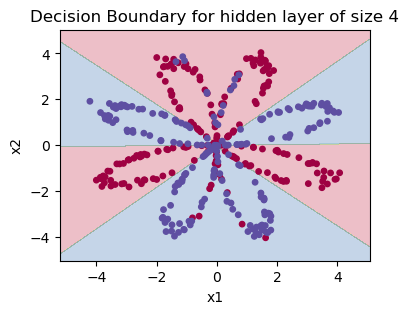

In [158]:
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title('Decision Boundary for hidden layer of size 4');

In [163]:
# accuracy on training data
y_preds = predict(params, X)
np.sum(y_preds == Y) / Y.size

0.9075

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.
Now, let's try out several hidden layer sizes.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 6 hidden units: 90.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %


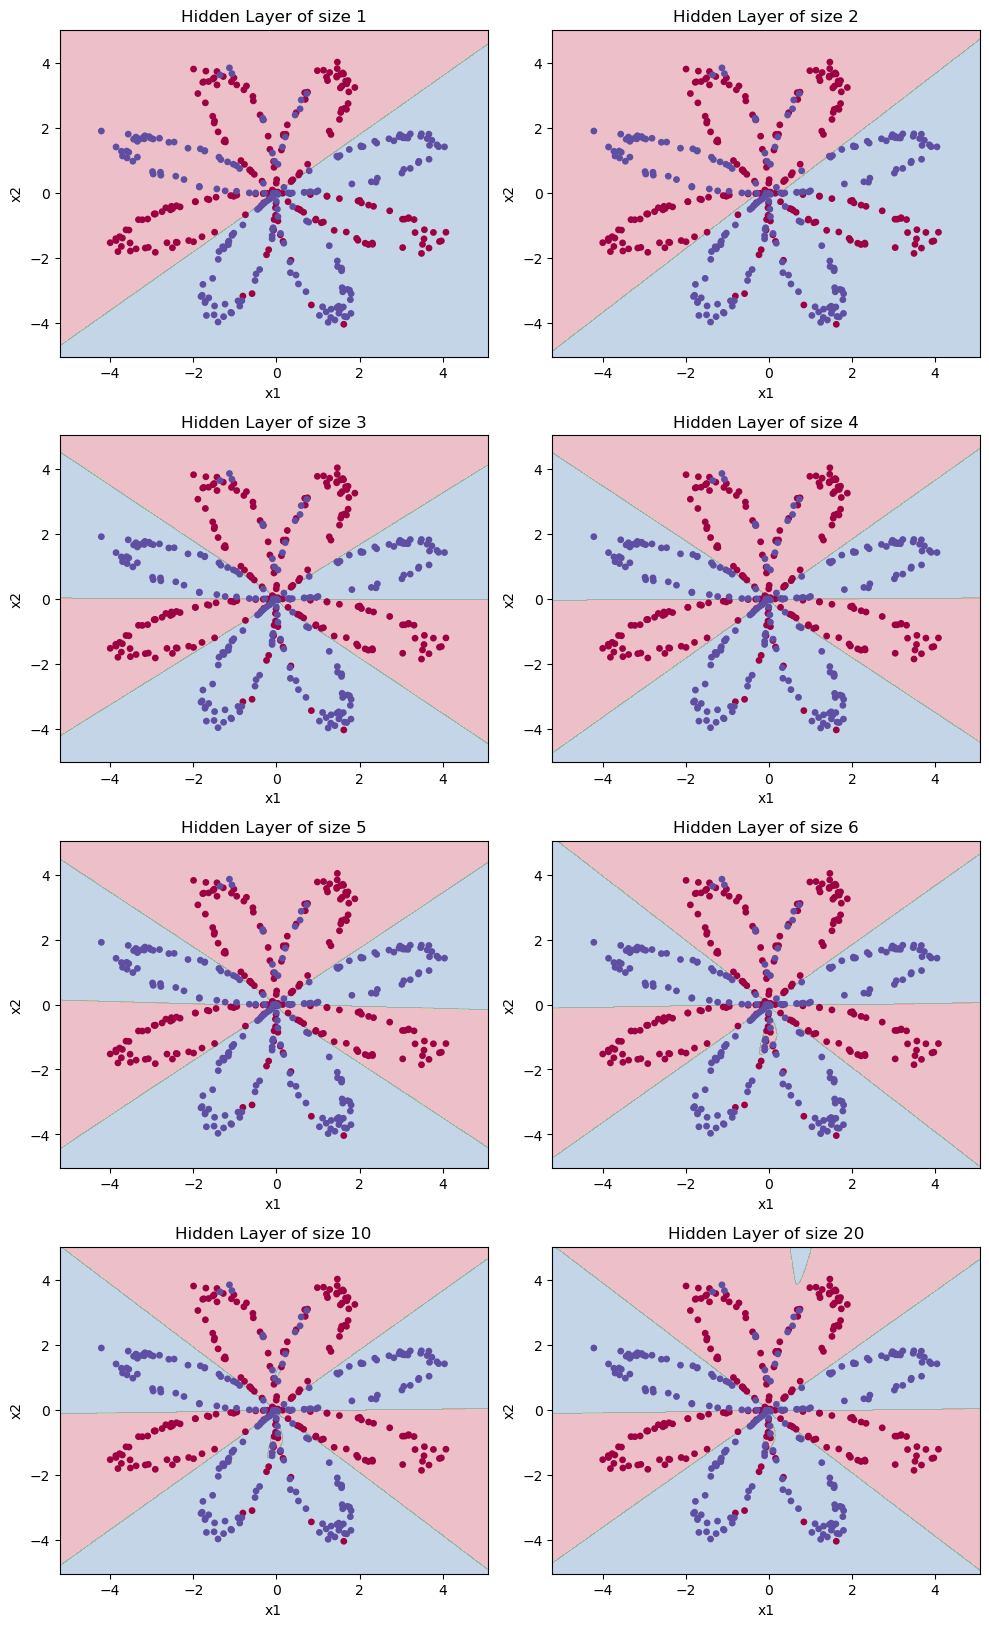

In [179]:
plt.figure(figsize=(10, 20))
hidden_layer_sizes = [1, 2, 3, 4, 5, 6, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    params = nn_model(X, Y, n_h, 1.2, n_iters = 5000)
    plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
    y_preds = predict(params, X)
    acc = 100 * np.sum(y_preds == Y) / Y.size
    print ("Accuracy for {} hidden units: {} %".format(n_h, acc))
plt.tight_layout()

**Interpretation**:
* The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
* The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to fits the data well without also incurring noticable overfitting.
* You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

Optional questions:
* What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
* Play with the learning_rate. What happens?
* What if we change the dataset?

In [190]:
class NN:
    def __init(self):
        self.params = {}
        self.grads = {}
        self.cache = {}

    def fit(self, X, Y, n_h, n_iters=1000, lr=0.1, print_cost=True):
        self.X = X
        self.Y = Y
        self.lr = lr
        self.m = X.shape[1]
        self.n_h = n_h
        self.n_x, self.n_y = self.layer_sizes(X, Y)
        self.initialize_params()
        for i in range(n_iters):
            A2 = self.forward_propagation(X)
            cost = self.compute_cost(A2)
            grads = self.backward_propagation()
            params = self.update_params()
            if print_cost and i % 1000 == 0:
                print('Cost after iteration %d: %f' % (i, cost))

    def layer_sizes(self, X, Y):
        n_x = X.shape[0]
        n_y = Y.shape[0]
        return n_x, n_y

    def initialize_params(self):
        np.random.seed(2)
        W1 = np.random.randn(self.n_h, self.n_x) * 0.01
        b1 = np.zeros((self.n_h, 1))
        W2 = np.random.randn(self.n_y, self.n_h) * 0.01
        b2 = np.zeros((self.n_y, 1))
        assert(W1.shape == (self.n_h, self.n_x))
        assert (b1.shape == (self.n_h, 1))
        assert (W2.shape == (self.n_y, self.n_h))
        assert (b2.shape == (self.n_y, 1))
        self.params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def forward_propagation(self, X):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']        
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)      
        assert(A2.shape == (1, X.shape[1]))     
        self.cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
        return A2

    def compute_cost(self, A2):
        logprobs = np.multiply(self.Y, np.log(A2)) + np.multiply((1 - self.Y), np.log(1 - A2))
        cost = -1/self.m * np.sum(logprobs)
        
        # makes sure cost is the dimension that we expect. ex: turns [[17]] into 17
        cost = float(np.squeeze(cost))
        assert(isinstance(cost, float))
        return cost

    def backward_propagation(self):  
        # gradient of the cost function J with respect to Z2, dJ/dZ2, activation is sigmoid
        dZ2 = self.cache['A2'] - self.Y
    
        # dJ/dW2
        dW2 = (1/self.m) * np.dot(dZ2, self.cache['A1'].T)
    
        # dJ/db2
        db2 = (1/self.m) * np.sum(dZ2, axis=1, keepdims=True)
    
        # dJ/dZ1, activation is tanh
        dZ1 = np.dot(self.params['W2'].T, dZ2) * (1 - np.power(self.cache['A1'], 2))  # (*) -> element-wise product, right-hand side:derivative of tanh
    
        # dJ/dW1
        dW1 = (1/self.m) * np.dot(dZ1, self.X.T)
    
        # dJ/db1
        db1 = (1/self.m) * np.sum(dZ1, axis=1, keepdims=True)
    
        self.grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    def update_params(self):    
        self.params['W1'] -= self.lr * self.grads['dW1']
        self.params['b1'] -= self.lr * self.grads['db1']
        self.params['W2'] -= self.lr * self.grads['dW2']
        self.params['b2'] -= self.lr * self.grads['db2']

    def predict(self, X):
        A2 = self.forward_propagation(X)
        return (A2 > 0.5) * 1

In [191]:
nn = NN()
nn.fit(X, Y, 4, n_iters=10000, lr=1.2, print_cost=True)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219439
Cost after iteration 9000: 0.218553


In [192]:
y_preds = nn.predict(X)

In [194]:
np.sum(y_preds == Y) / Y.size

0.9075

### Performance on different datasets

In [197]:
from sklearn import datasets

In [229]:
def load_extra_datasets():  
    N = 200
    noisy_circles = datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = datasets.make_moons(n_samples=N, noise=.2)
    blobs = datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, 
                                                                  n_classes=2, shuffle=True, random_state=None)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles

In [230]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles = load_extra_datasets()

### Noisy Circles dataset

In [255]:
X, Y = noisy_circles

In [232]:
X.shape

(200, 2)

In [233]:
Y.shape

(200,)

In [256]:
X = X.T
Y = Y.reshape(1, Y.size)

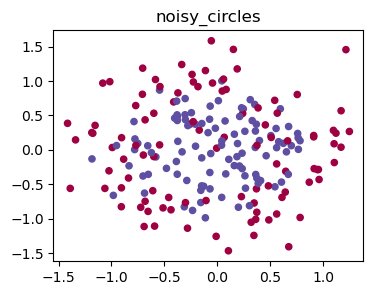

In [257]:
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title('noisy_circles');

In [278]:
nn = NN()
nn.fit(X, Y, 4, n_iters=10000, lr=0.6, print_cost=True)

Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.691647
Cost after iteration 2000: 0.481864
Cost after iteration 3000: 0.454274
Cost after iteration 4000: 0.452545
Cost after iteration 5000: 0.451203
Cost after iteration 6000: 0.448943
Cost after iteration 7000: 0.446493
Cost after iteration 8000: 0.444227
Cost after iteration 9000: 0.442553


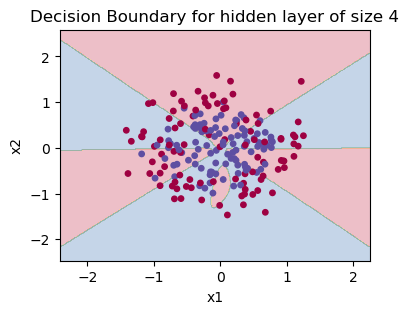

In [280]:
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title('Decision Boundary for hidden layer of size 4');

### Noisy Moons dataset

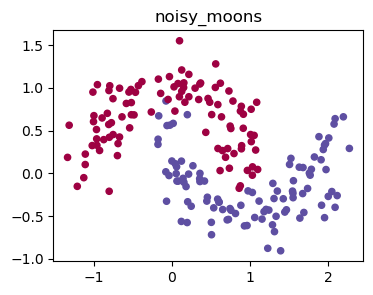

In [245]:
X, Y = noisy_moons
X = X.T
Y = Y.reshape(1, Y.size)
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title('noisy_moons');

In [252]:
nn = NN()
nn.fit(X, Y, 4, n_iters=10000, lr=1.1, print_cost=True)

Cost after iteration 0: 0.692993
Cost after iteration 1000: 0.052473
Cost after iteration 2000: 0.032520
Cost after iteration 3000: 0.030038
Cost after iteration 4000: 0.028863
Cost after iteration 5000: 0.028100
Cost after iteration 6000: 0.027541
Cost after iteration 7000: 0.027103
Cost after iteration 8000: 0.026751
Cost after iteration 9000: 0.026460


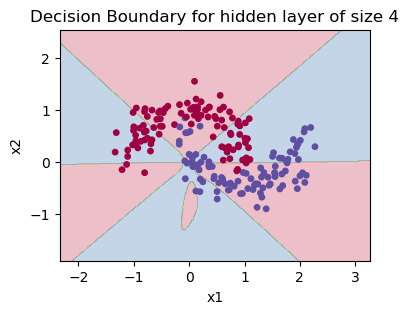

In [254]:
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title('Decision Boundary for hidden layer of size 4');

### Blobs dataset

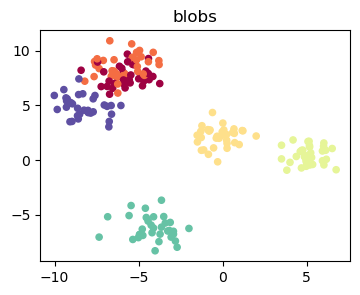

In [281]:
X, Y = blobs
X = X.T
Y = Y.reshape(1, Y.size)
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title('blobs');

In [217]:
Y

array([[2, 3, 4, 3, 1, 2, 5, 2, 0, 2, 0, 1, 0, 0, 4, 2, 0, 4, 4, 2, 4, 1,
        2, 5, 1, 0, 5, 0, 2, 3, 4, 2, 3, 0, 5, 2, 2, 0, 2, 5, 0, 4, 1, 1,
        0, 0, 3, 5, 0, 0, 2, 0, 3, 0, 5, 2, 5, 2, 1, 0, 2, 4, 4, 2, 5, 4,
        3, 5, 1, 4, 2, 3, 2, 1, 1, 4, 1, 3, 1, 3, 2, 3, 4, 5, 1, 4, 4, 0,
        0, 2, 4, 2, 5, 4, 0, 4, 5, 3, 1, 3, 3, 1, 0, 1, 2, 1, 1, 3, 3, 0,
        5, 0, 5, 2, 1, 5, 3, 3, 1, 4, 2, 5, 1, 3, 3, 5, 2, 1, 3, 4, 0, 5,
        1, 1, 1, 5, 3, 1, 0, 0, 5, 3, 5, 5, 2, 3, 5, 4, 1, 0, 5, 4, 2, 5,
        5, 2, 0, 0, 1, 3, 3, 3, 3, 0, 2, 4, 0, 4, 4, 1, 3, 0, 4, 5, 2, 4,
        4, 5, 1, 1, 3, 5, 1, 4, 4, 1, 2, 5, 0, 4, 3, 1, 5, 4, 3, 4, 2, 5,
        3, 0]])

In [218]:
Y % 2

array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0]], dtype=int32)

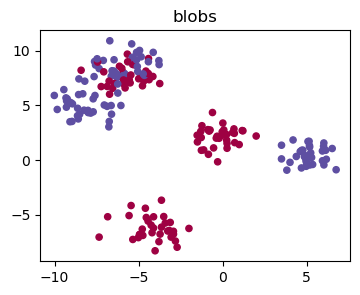

In [282]:
X, Y = blobs
X = X.T
Y = Y.reshape(1, Y.size)
Y = Y % 2
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title('blobs');

In [326]:
nn = NN()
nn.fit(X, Y, 6, n_iters=10000, lr=0.1, print_cost=True)

Cost after iteration 0: 0.693030
Cost after iteration 1000: 0.267415
Cost after iteration 2000: 0.236656
Cost after iteration 3000: 0.228021
Cost after iteration 4000: 0.222297
Cost after iteration 5000: 0.214305
Cost after iteration 6000: 0.209466
Cost after iteration 7000: 0.206452
Cost after iteration 8000: 0.204427
Cost after iteration 9000: 0.202915


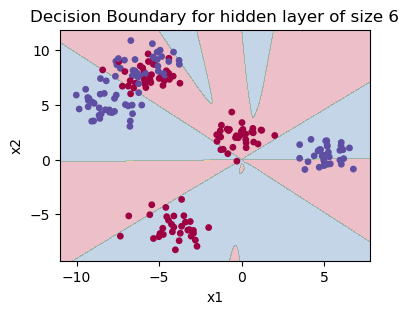

In [328]:
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title('Decision Boundary for hidden layer of size 6');

### Gaussian Quantiles dataset

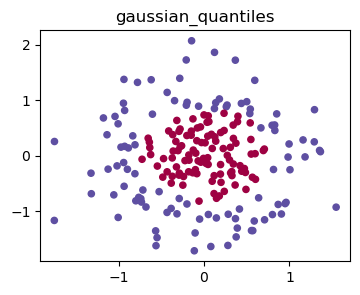

In [329]:
X, Y = gaussian_quantiles
X = X.T
Y = Y.reshape(1, Y.size)
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title('gaussian_quantiles');

In [348]:
nn = NN()
nn.fit(X, Y, 8, n_iters=10000, lr=0.1, print_cost=True)

Cost after iteration 0: 0.693155
Cost after iteration 1000: 0.688518
Cost after iteration 2000: 0.578597
Cost after iteration 3000: 0.434074
Cost after iteration 4000: 0.188081
Cost after iteration 5000: 0.124085
Cost after iteration 6000: 0.100257
Cost after iteration 7000: 0.086320
Cost after iteration 8000: 0.077520
Cost after iteration 9000: 0.071301


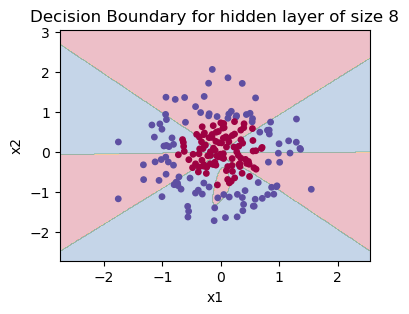

In [350]:
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title('Decision Boundary for hidden layer of size 8');